# __D208 PA Task 1:__ *Multiple Linear Regression*
>### Aaminah Halipoto
>### Western Governor's University
>### D208: Predictive Modeling
>### Prof. Taylor Jensen
>### Sept 19. 2024

### Table of Contents
>A1. [Research Question](#researchquestion) </br>
A2. [Goals](#goals)</br>
B1. [Summary of Assumptions](#summaryassumption)</br>
B2. [Tools Benefits](#toolsbenefits)</br>
B3. [Appropriate Technique](#appropriatetechnique)</br>
C1. [Data cleaning](#datacleaning)</br>
C2. [Summary statistics](#summarystatistics)</br>
C3. [Visualizations](#visualizations)</br>
C4. [Data transformation](#datatransformation)</br>
C5. [Prepared data set](#prepareddataset)</br>
C5.1 [Primary component analysis](#pcadata)</br>
D1. [Initial model](#initialmodel)</br>
D2. [Justification of model reduction](#justification)</br>
D2.1 [Variance inflation factor](#vif)</br> 
D3. [Reduced linear regression model](#reducedmodel)</br>
E1. [Model comparison](#modelcomparison)</br>
E2. [Output and calculations](#output)</br>
E3. [Code](#endcode)</br>
F1. [Results](#results)</br>
F2. [Recommendations](#recommendations)</br>
G. [Panopto Demonstration](#panoptolink)</br>
H. [Sources of Third-Party Code](#codesources)</br>
I. [Web Sources](#sources)</br>

#### __A1. Research Question__ <a name="researchquestion"></a>
What factors influence the amount of data consumption per customer, represented by the continuous variable ‘Bandwidth_GB_Year’?


#### __A2. Goals__ <a name="goals"></a>
The goal of my analysis is to find the features within the Churn dataset that distinctly correlate to the customer’s data consumption.


#### __B1. Summary of Assumptions__ <a name="summaryassumption"></a>
We assume four properties of the model to proceed with linear regression (Statistics Solutions). </br>
>1. The function of the model is linear, connecting the predictors in a straight line. </br>
>2. The data is not multicollinear, and the variables within the dataset occur independently of each other. </br>
>3. The residual variables are homoscedastic, having similar variances across the model.</br>
>4. The residuals are normally distributed.


#### __B2. Tools Benefits__ <a name="toolsbenefits"></a>
I used Python for its adroitness in processing large volumes of data, as well as the feasibility of its many data analysis-oriented libraries (R or Python.). __Pandas__ is the most frequently used library for its capabilities in manipulating dataframes and creating visualizations. __Seaborn__ is another useful library for creating detailed visualizations such as the boxplot, which is an essential tool for visualizing outliers. I used the __SciPy stats package__ for basic statistical calculations, along with __NumPy__ for basic algebra. __Sklearn__ contains functions for running primary component analyses. The __Statsmodels__ package contains the useful APIs for creating linear regression models and providing summary info on model structures, as well as variance inflation factor processing.


#### __B3. Appropriate Technique__ <a name="appropriatetechnique"></a>
Multiple linear regression (MLR) is the correct way to assess my research question because I am looking to compare many explanatory variables to a singular, continuous quantitative response variable. Because the response variable is continuous, it is still possible to represent its predictions with a straight line, or a linear equation. Multiple linear regression allows me to assess how multiple variables (whether quantitative or otherwise) affect the continuous response variable at the same time; comparing many variables, rather than a single variable as in normal linear regression, allows us to create more educated predictions, and thus more robust recommendations to stakeholders.

#### __C1. Data cleaning__ <a name="datacleaning"></a>
My goals in data cleaning are to clear the dataset of any duplicate records or null values. I must also deal appropriately with outliers, as they heavily influence the fit of the model I aim to create. Despite how sensitive models are to outliers, I also proceed with the understanding that I will likely retain most outliers in the dataframe, given that many are likely true values representing the sample at hand.

The following cells below illustrate the cleaning process.

In [127]:
#import necessary functions
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.api import qqplot
import matplotlib.pyplot as plt
import seaborn as sb
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

#setting "clean" data as a dataframe
df = pd.read_csv('C://Users/Aaminah/Desktop/masters/D208/churn_clean.csv')

#allowing our dictionaries to cast between datatypes
pd.set_option('future.no_silent_downcasting', True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [128]:
#rectifying mistaken null value
df.fillna({'InternetService': "None"}, inplace = True)

In [129]:
#checking for duplicates. None are found, continue
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [130]:
#checking for nulls. None are found, continue
df.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

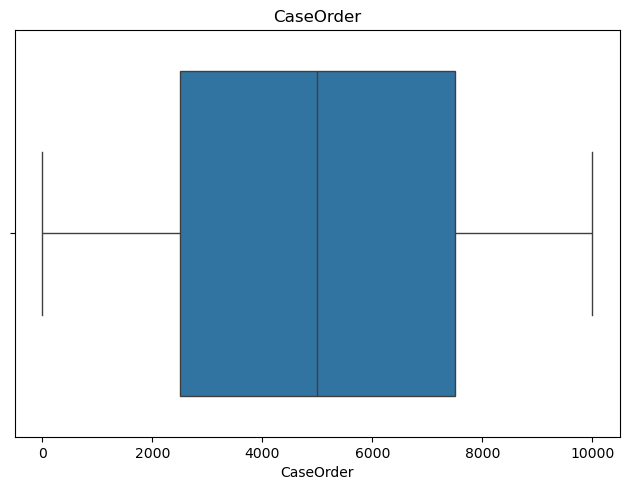

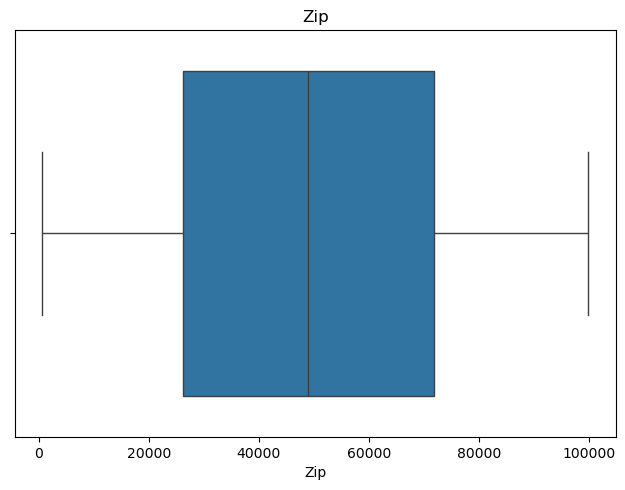

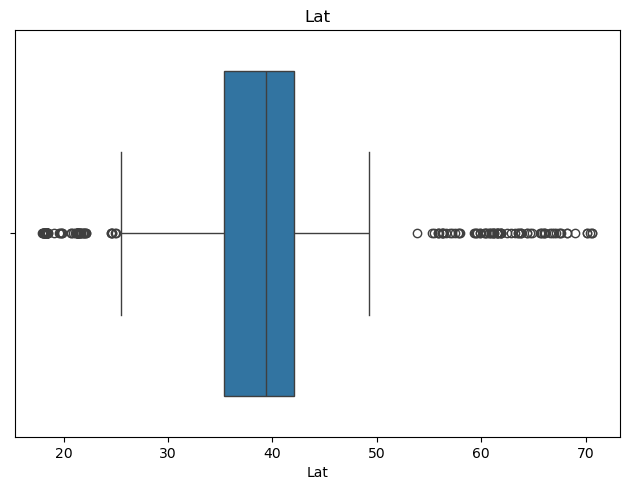

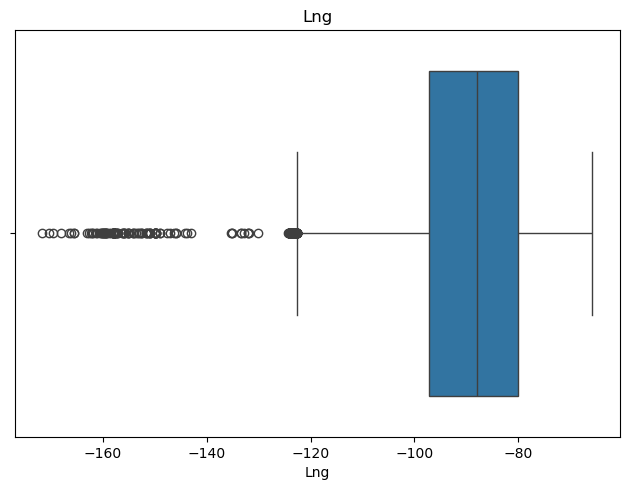

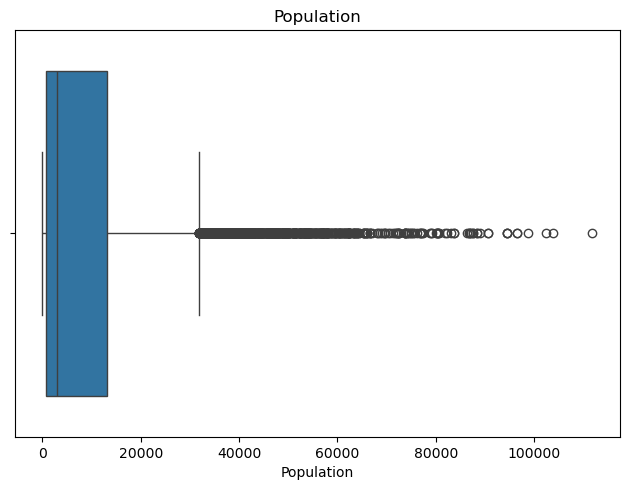

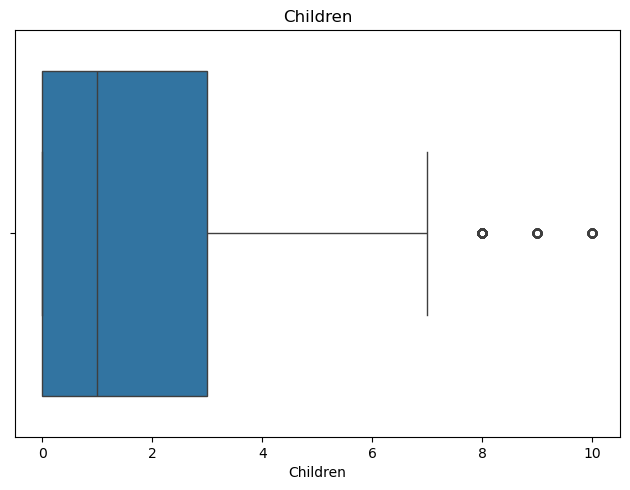

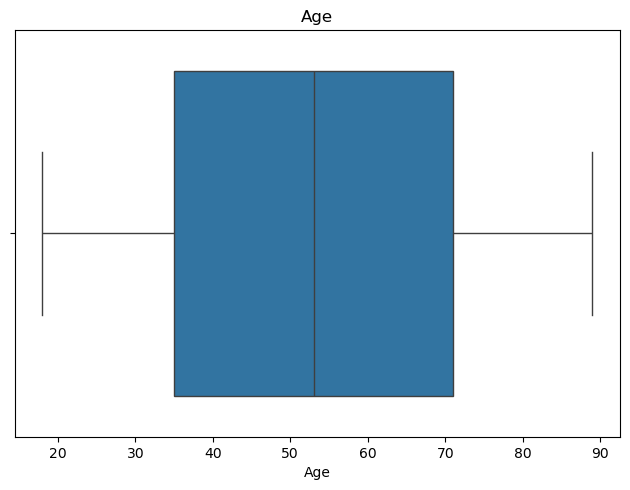

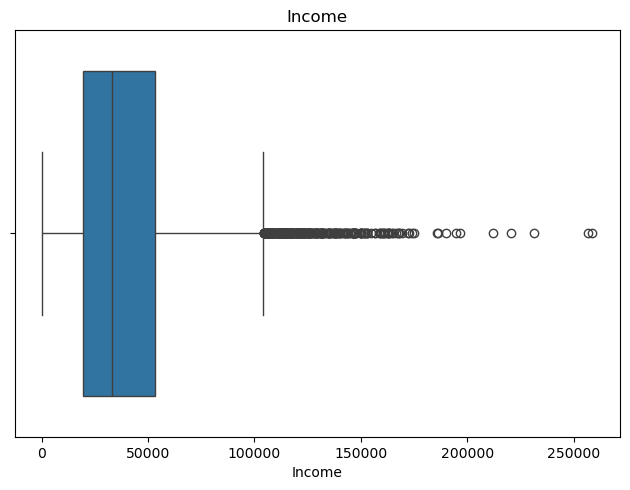

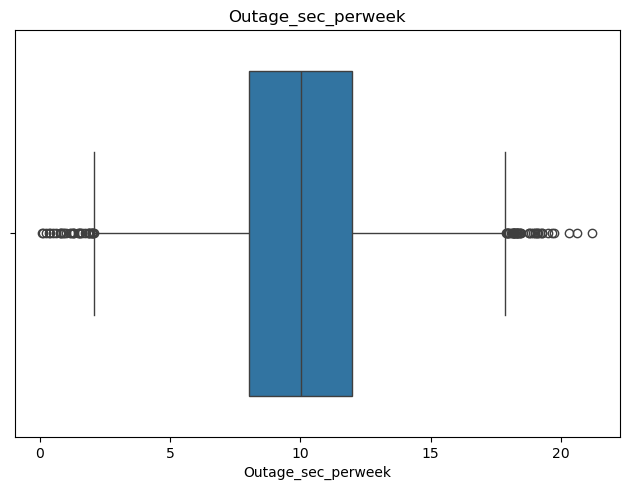

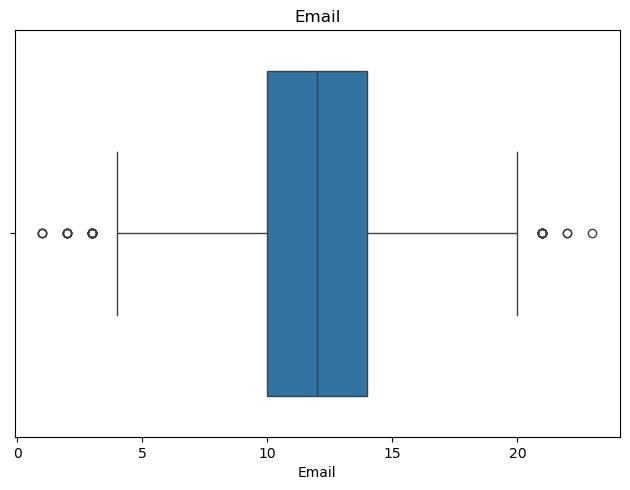

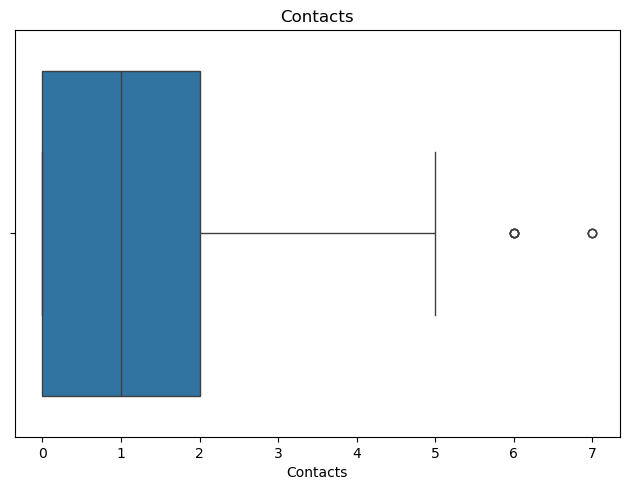

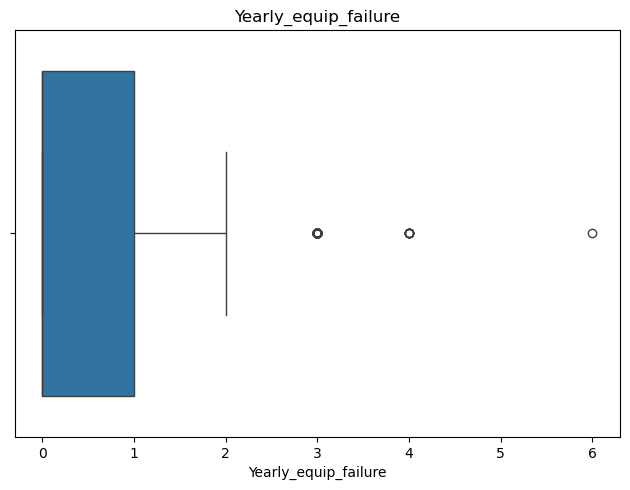

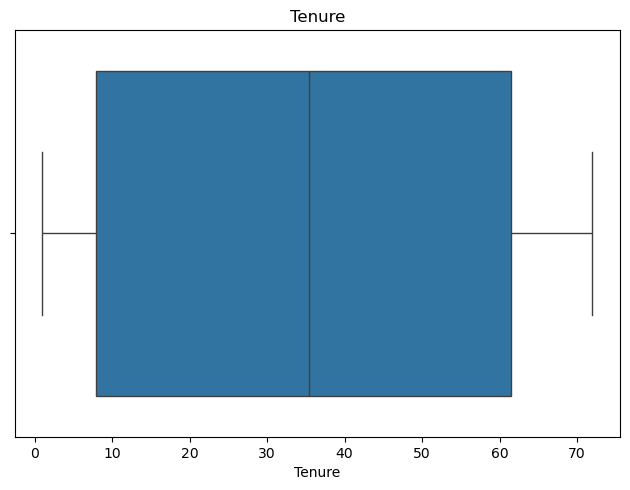

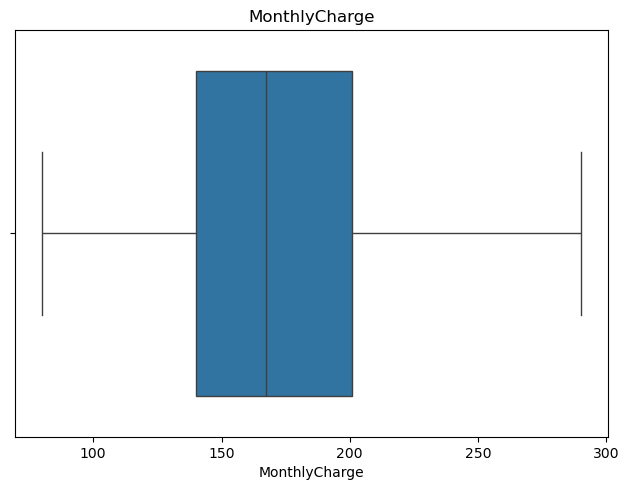

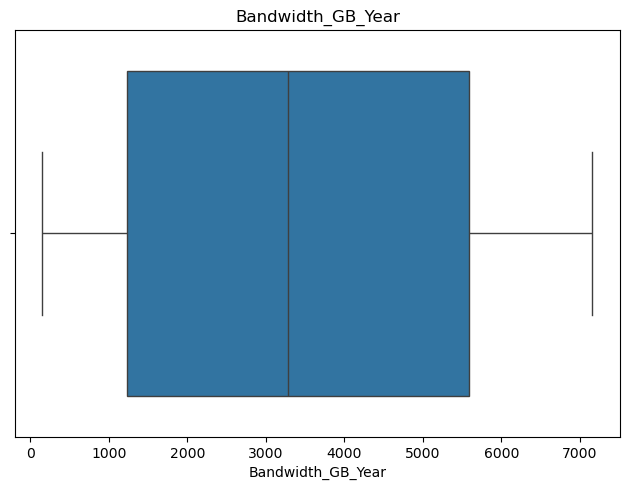

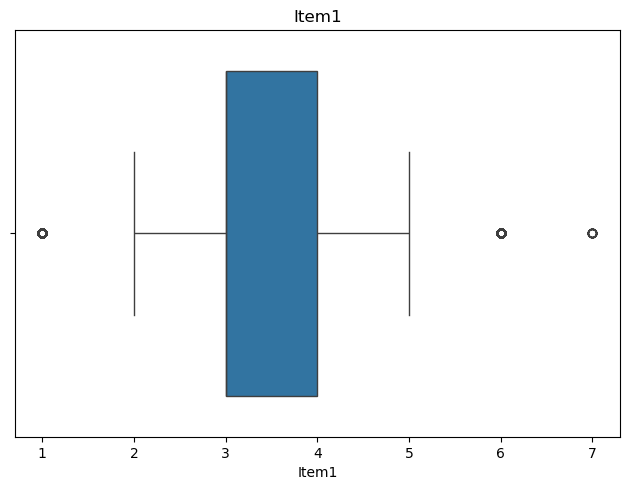

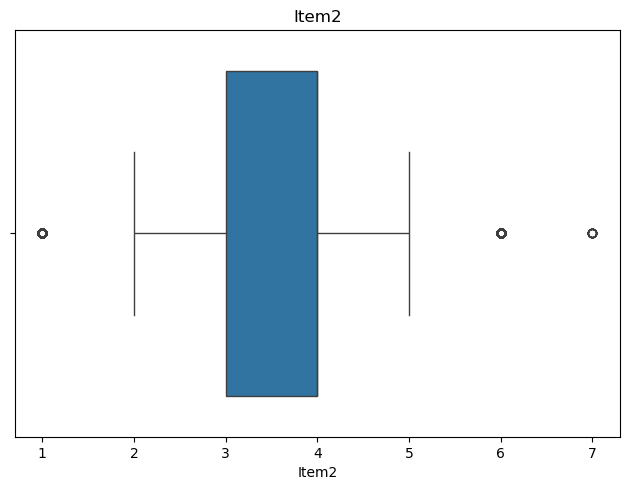

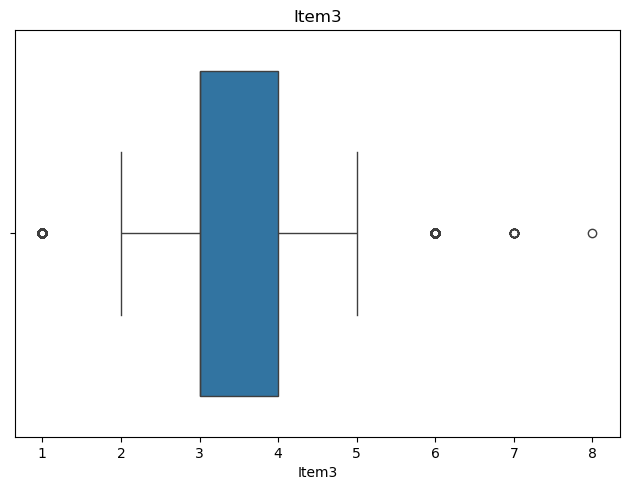

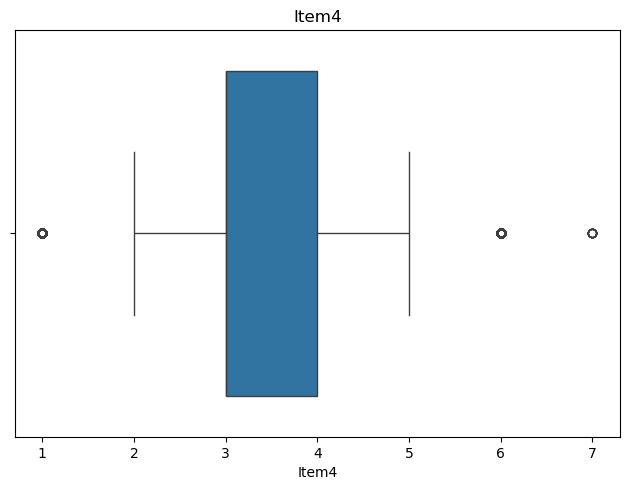

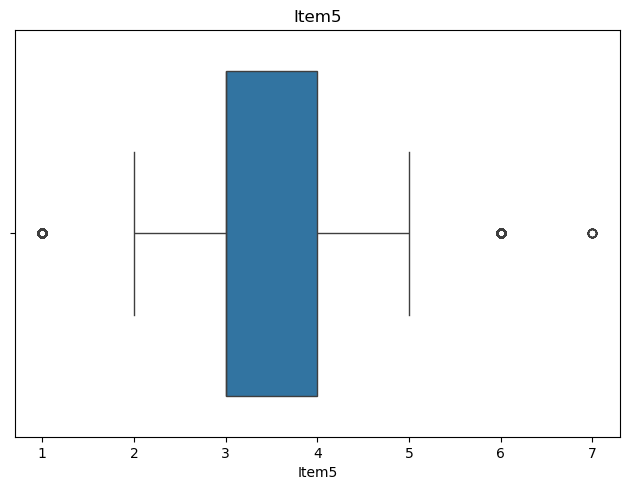

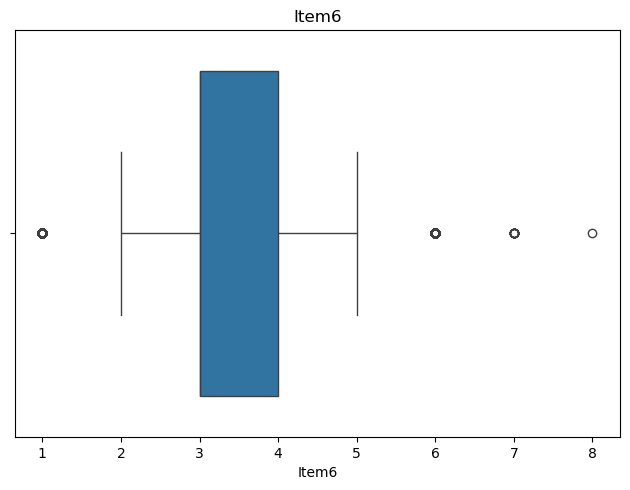

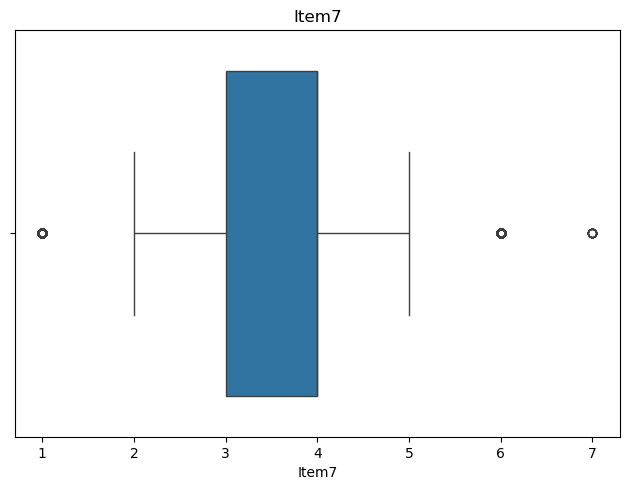

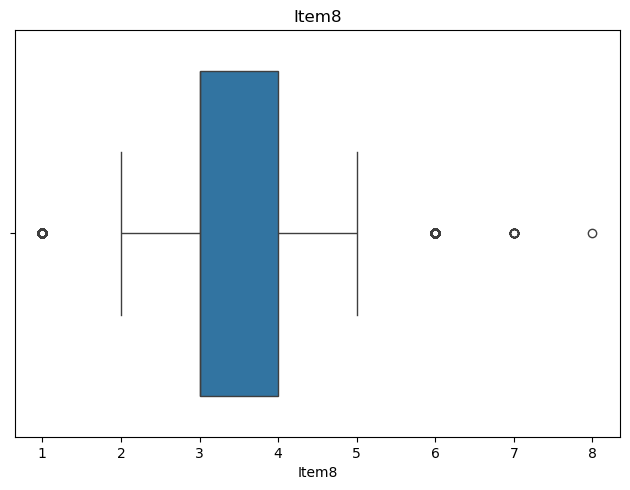

In [131]:
#assessing outliers using boxplots for all numeric variables. Outliers are acceptable as is,
#and will not require further cleaning.
for col in df: 
    if pd.api.types.is_numeric_dtype(df[col]):
        boxplot = sb.boxplot(x=df[col], data=df)
        plt.tight_layout()
        plt.title(col)
        plt.show()
    else: continue

#### __C2. Summary statistics__ <a name="summarystatistics"></a>
The cell below contains summary statistics on the numeric variables within the dataset. 
>The __count__ refers to the discrete number of observations within each column, which is a uniform 10,000 amongst all variables.

>__Mean__ refers to the average value amongst all observations in the column.

>The __standard deviation__ is a measure related to the mean, and represents the degree to which the observations in each column vary around the mean -- a smaller standard deviation means values are typically closer to the mean, and vice versa.

> __Minimum and maximum__ are the numerical least and greatest values amongst observations in the dataset.

>The __quantiles__ -- 25%, 50%, and 75% -- represent the values found when portioning the dataset into its bottom quarter, bottom half, and bottom three-quarters of data, respectively.

>The 50% percentile is also known as the __median__ of the dataset, representing the logical middle of the dataset.

It should be understood that the last 8 variables in this summary, item1 and so on, are considered categorical variables. Their numeric appearance describes categories rather than a measured amount or count.

In [133]:
#creating dataframe to temporarily house variables I am interested in.
newdata = df[['Tenure', 'Lat', 'Lng', 'Outage_sec_perweek', 'MonthlyCharge', 
              'Income', 'Yearly_equip_failure', 'Email', 'Age', 'Children',
              'Contract', 'Churn', 'Techie']]
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Tenure                10000 non-null  float64
 1   Lat                   10000 non-null  float64
 2   Lng                   10000 non-null  float64
 3   Outage_sec_perweek    10000 non-null  float64
 4   MonthlyCharge         10000 non-null  float64
 5   Income                10000 non-null  float64
 6   Yearly_equip_failure  10000 non-null  int64  
 7   Email                 10000 non-null  int64  
 8   Age                   10000 non-null  int64  
 9   Children              10000 non-null  int64  
 10  Contract              10000 non-null  object 
 11  Churn                 10000 non-null  object 
 12  Techie                10000 non-null  object 
dtypes: float64(6), int64(4), object(3)
memory usage: 1015.8+ KB


In [134]:
#obtaining summary statistics on all variables.
newdata.describe()

,Tenure,Lat,Lng,Outage_sec_perweek,MonthlyCharge,Income,Yearly_equip_failure,Email,Age,Children
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000
mean,34.526188,38.757567,-90.782536,10.001848,172.624816,39806.926771,0.398000,12.016000,53.078400,2.0877
std,26.443063,5.437389,15.156142,2.976019,42.943094,28199.916702,0.635953,3.025898,20.698882,2.1472
min,1.000259,17.966120,-171.688150,0.099747,79.978860,348.670000,0.000000,1.000000,18.000000,0.0000
25%,7.917694,35.341828,-97.082812,8.018214,139.979239,19224.717500,0.000000,10.000000,35.000000,0.0000
50%,35.430507,39.395800,-87.918800,10.018560,167.484700,33170.605000,0.000000,12.000000,53.000000,1.0000
75%,61.479795,42.106908,-80.088745,11.969485,200.734725,53246.170000,1.000000,14.000000,71.000000,3.0000
max,71.999280,70.640660,-65.667850,21.207230,290.160419,258900.700000,6.000000,23.000000,89.000000,10.0000


In contrast to numerical variables, most categorical variables consist of the object datatype and thus must be summarized differently. Categorical variables are summarized in the cell below, according to each unique value within the variable alongside its percent frequency of occurrence.

In [136]:
#summarizing 
for col in newdata:
    if pd.api.types.is_object_dtype(df[col]):
        print('Variable:', col, '(out of 10,000 observations)')
        print(df[col].value_counts(dropna=False, normalize=True)
              .mul(100).round(1).apply(lambda x: f"{x}%").to_string())
        print("\n")
    else: continue

Variable: Contract (out of 10,000 observations)
Contract
Month-to-month    54.6%
Two Year          24.4%
One year          21.0%


Variable: Churn (out of 10,000 observations)
Churn
No     73.5%
Yes    26.5%


Variable: Techie (out of 10,000 observations)
Techie
No     83.2%
Yes    16.8%




#### __C3. Visualizations__ <a name="visualizations"></a>
Visualizations of the data to be used in the initial model are below. I chose these variables based on __[PCA data](#pcadata)__ suggesting they are of interest for my target variable, 'Bandwidth_GB_year'.

#### <u>Univariate visualizations</u>

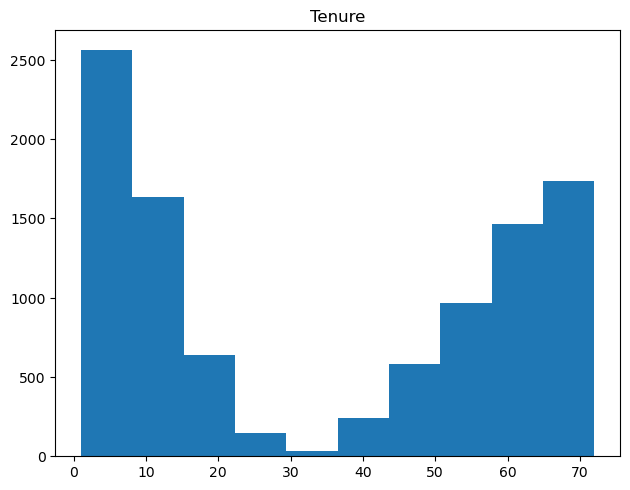

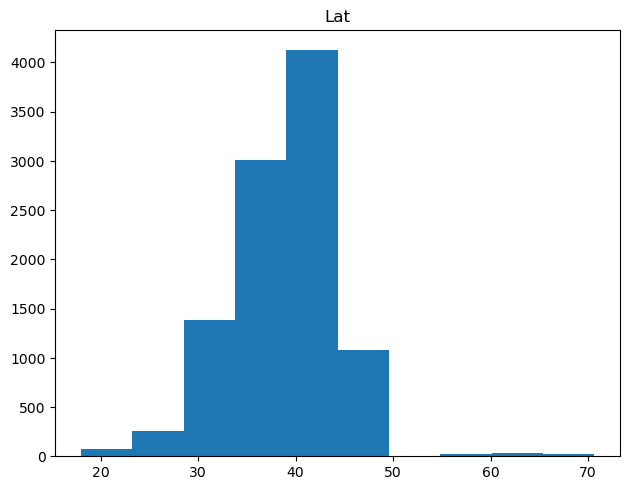

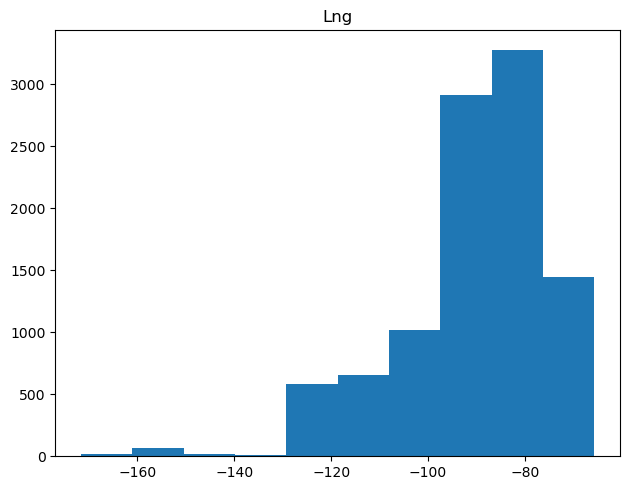

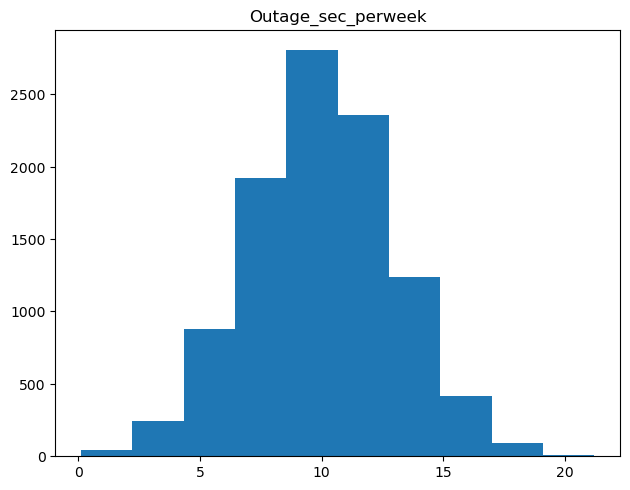

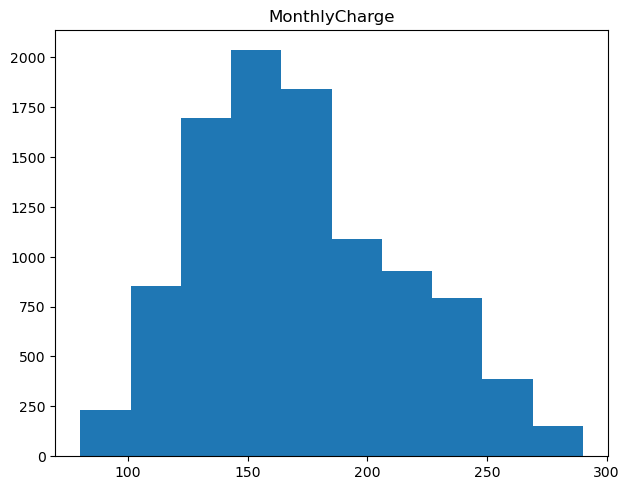

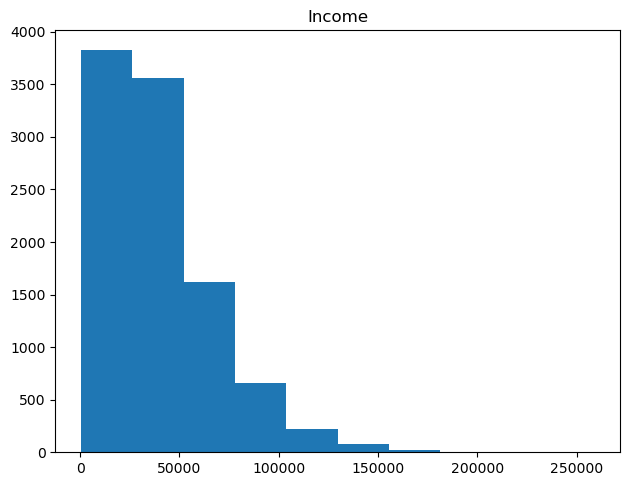

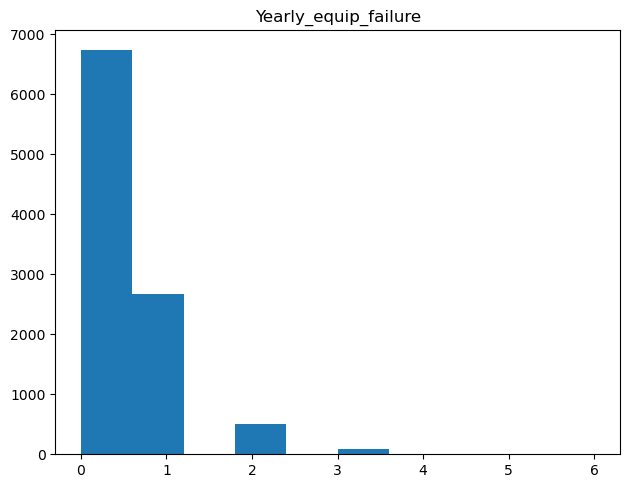

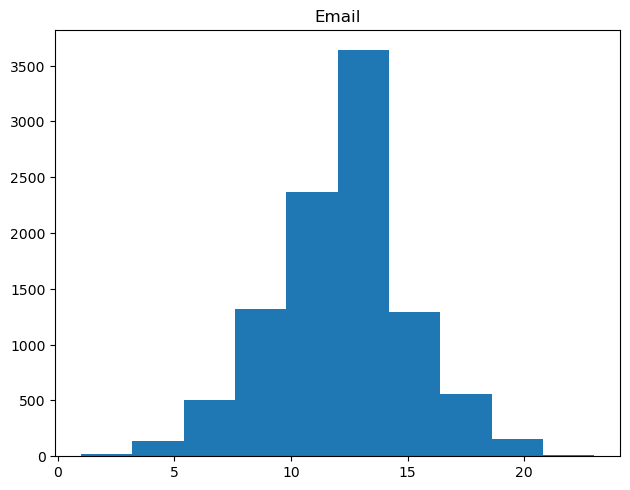

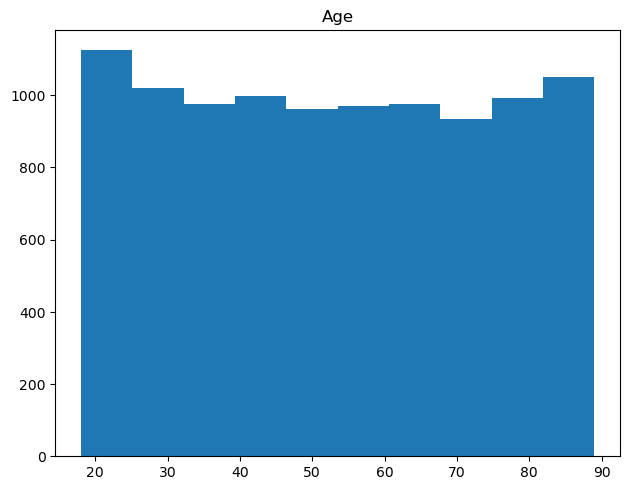

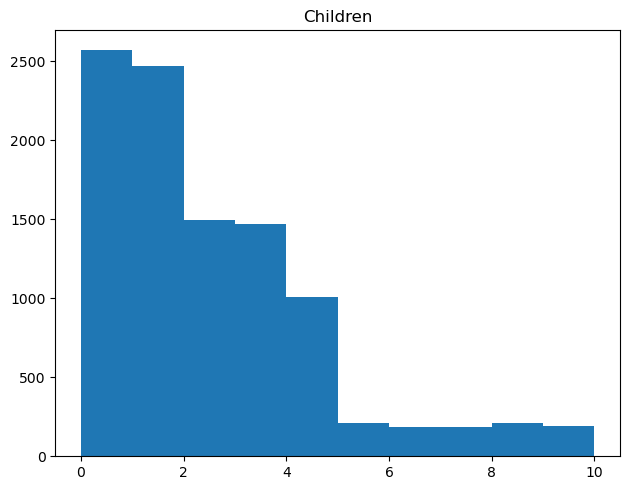

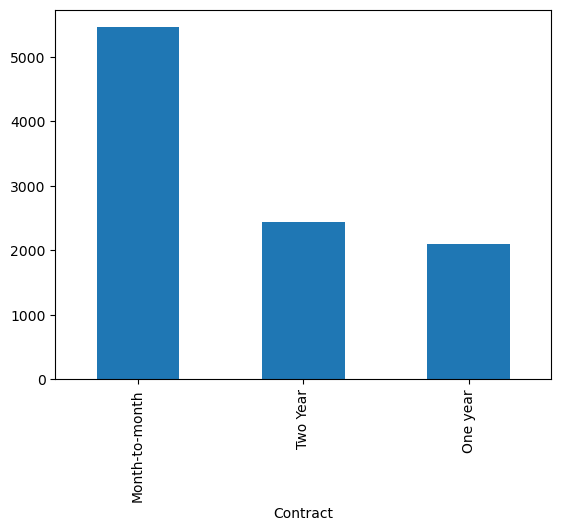

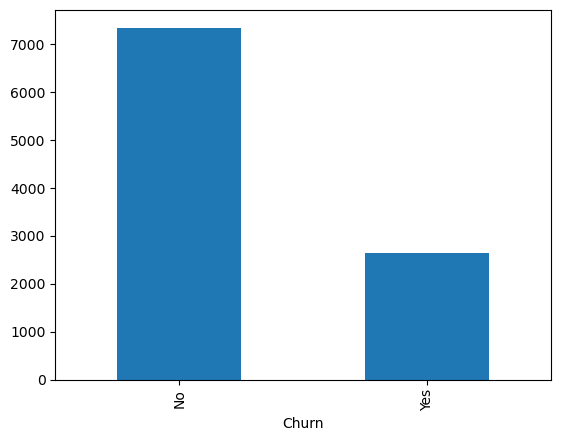

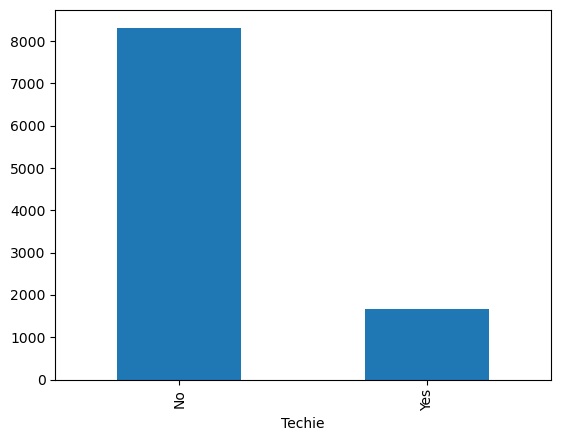

In [139]:
#histograms for explanatory variables
for col in newdata: 
    if pd.api.types.is_numeric_dtype(newdata[col]):
        plt.hist(newdata[col])
        plt.tight_layout()
        plt.title(col)
        plt.show()
    else: 
        newdata[col].value_counts(dropna=False).plot(kind='bar')
        newdata[[col]].value_counts(dropna=False)
        plt.show()

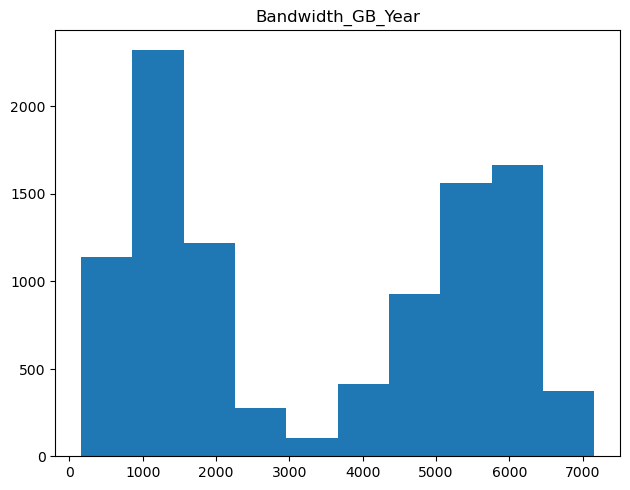

In [140]:
#histogram for response variable
plt.hist(df['Bandwidth_GB_Year'])
plt.tight_layout()
plt.title('Bandwidth_GB_Year')
plt.show()

#### <u>Bivariate visualizations</u>

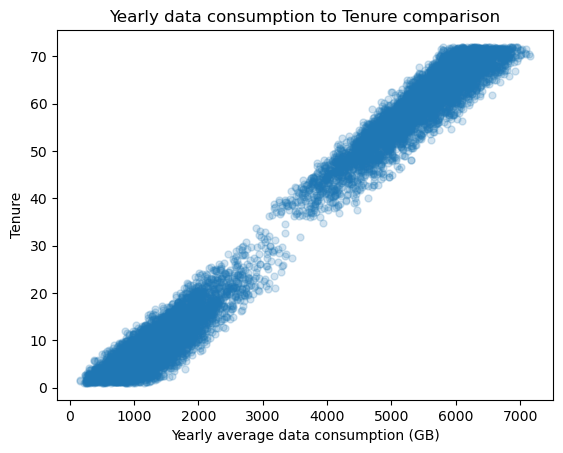

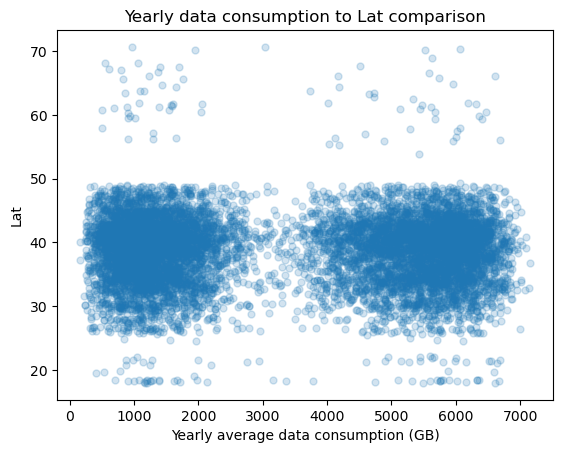

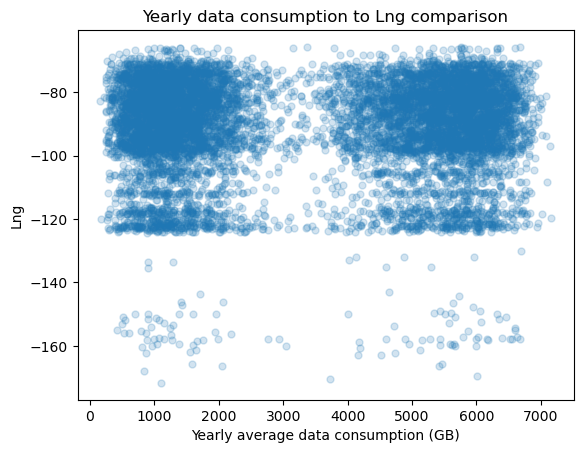

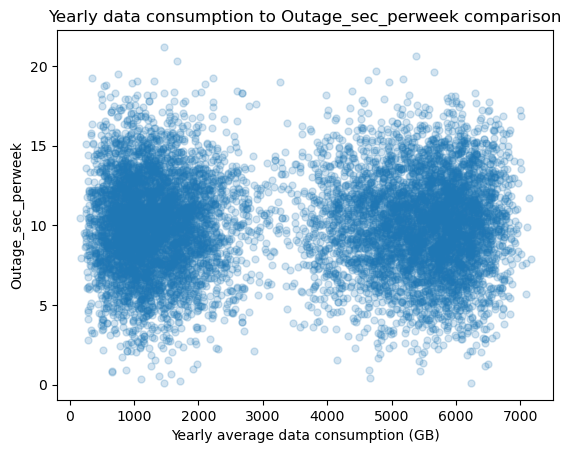

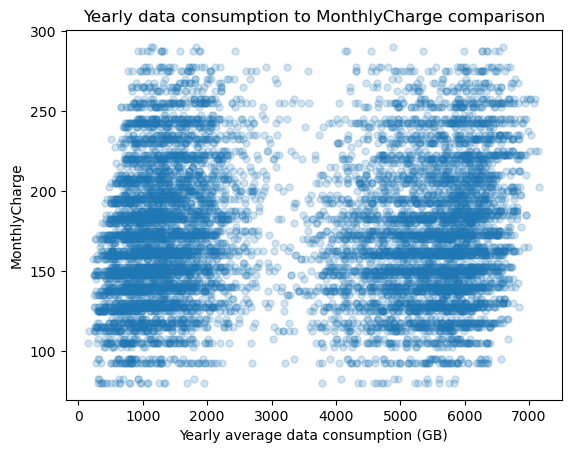

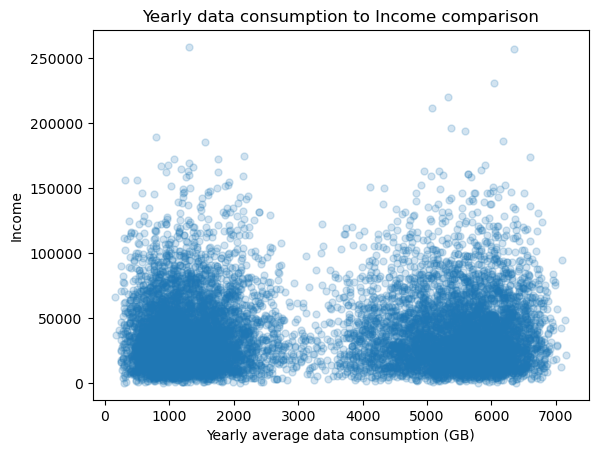

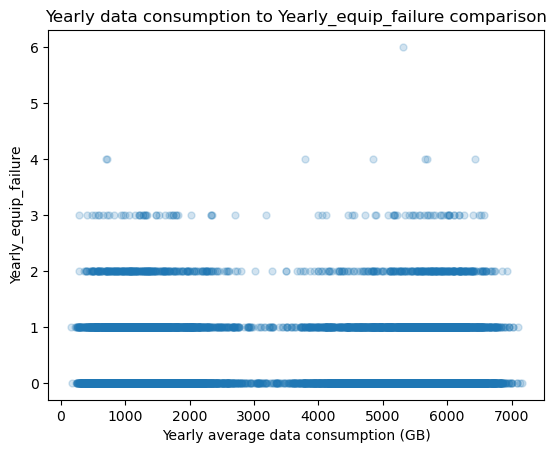

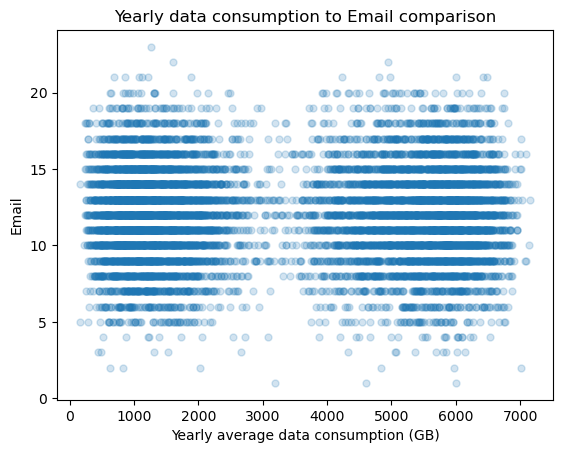

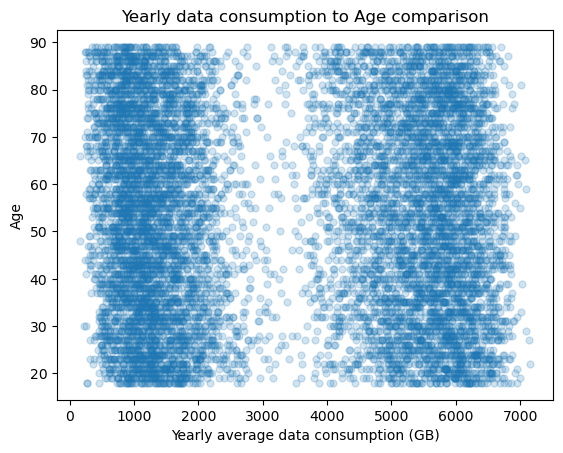

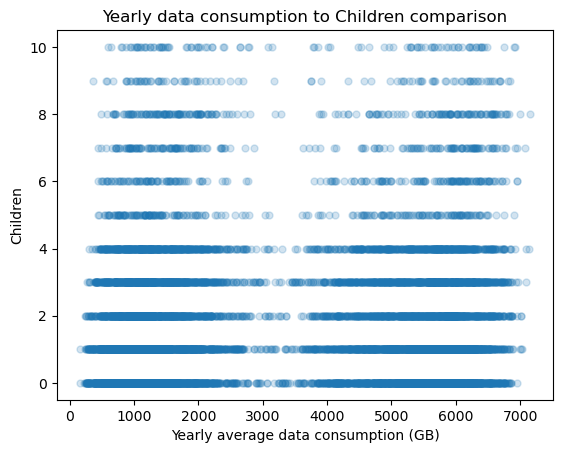

<Figure size 640x480 with 0 Axes>

In [142]:
#bivariate visualizations (numerical v. numerical) via scatterplot
for col in newdata:
    if pd.api.types.is_numeric_dtype(newdata[col]):
        plt.scatter(data=df, x='Bandwidth_GB_Year', y=f"{col}", 
                alpha=0.2, s=25)
        # labels & title
        plt.ylabel(f"{col}")
        plt.xlabel('Yearly average data consumption (GB)')
        plt.title(f"Yearly data consumption to {col} comparison")
        plt.show()
    
        # Remove border box
        sb.despine(trim=True, left=True);
    else: continue

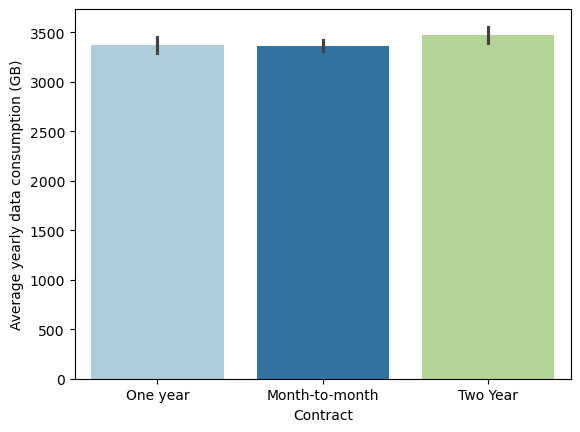

In [143]:
#bivariate visualization (categorical v. numerical) via barplot
sb.barplot(x='Contract',y='Bandwidth_GB_Year',data=df, hue='Contract', palette="Paired").set(ylabel='Average yearly data consumption (GB)')
plt.show()

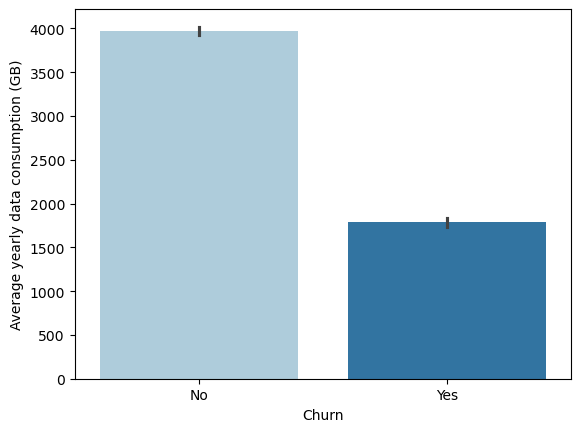

In [144]:
#bivariate visualization (categorical v. numerical) via barplot
sb.barplot(x='Churn',y='Bandwidth_GB_Year',data=df, hue='Churn', palette="Paired").set(
           ylabel='Average yearly data consumption (GB)')
plt.show()

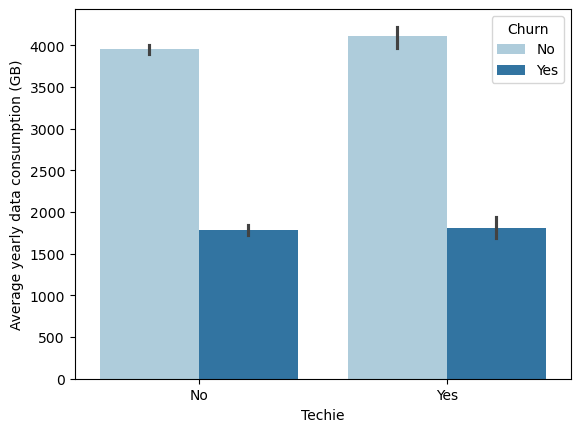

In [145]:
#bivariate visualization (categorical v. numerical) via barplot
sb.barplot(x='Techie',y='Bandwidth_GB_Year',data=df, hue='Churn', palette="Paired").set(
           ylabel='Average yearly data consumption (GB)')
plt.show()

#### __C4. Data Transformation (Data Wrangling)__ <a name="datatransformation"></a>
The necessary data transformation conducted for this dataset concerns the categorical Contract, Churn, and Techie variables. 

In order to transform its string values into usable numeric values, I performed one-hot encoding, where a dummy variable is created for each unique value occurring in Contract using Pandas <pd.getdummies()>. The unique values in Contract are 'Month-to-month', 'One year', and 'Two Year'. The new dummy variables contain 0s and 1s, where 1 is a record of that value occurring for each record. After creating all dummy variables, I shift them into my dataset to be used in my model.

Churn and Techie are less complicated: I create a data dictionary to encode No values as 0, and Yes values as 1. Creating a new dummy variable within my original dataset to translate the values over leaves me with numerical columns that refer to the original categorical data.

In [147]:
#beginning encoding for a categorical explanatory variable in my MLR dataset
contract_encoded = pd.get_dummies(df['Contract'], dtype = int)
contract_encoded.head()

,Month-to-month,One year,Two Year
0,0,1,0
1,1,0,0
2,0,0,1
3,0,0,1
4,1,0,0


In [148]:
#transferring dummy variables into dataframe
df['Contract_monthly'] = contract_encoded['Month-to-month']
df['Contract_one'] = contract_encoded['One year']
df['Contract_two'] = contract_encoded['Two Year']
print(df['Contract_two'])
df['Contract_one'].value_counts()

0       0
1       0
2       1
3       1
4       0
       ..
9995    0
9996    1
9997    0
9998    1
9999    0
Name: Contract_two, Length: 10000, dtype: int32


Contract_one
0    7898
1    2102
Name: count, dtype: int64

In [149]:
df['Churn_numeric'] = df['Churn']
dict_churn = {"Churn_numeric": {"No": 0, "Yes": 1}}
df = df.replace(dict_churn)
df["Churn_numeric"]= df["Churn_numeric"].astype(float)

In [150]:
df['Techie_numeric'] = df['Techie']
dict_techie = {"Techie_numeric": {"No": 0, "Yes": 1}}
df = df.replace(dict_techie)
df["Techie_numeric"]= df["Techie_numeric"].astype(float)

#### __C5. Prepared data set__ <a name="prepareddataset"></a>
Testdata is a dataframe to house potential variables in good fit for the model. Variables with a significant degree of correlation to each other will produce collinearity in a model and thus must be removed to preserve accuracy.

In [152]:
#creating tentative first dataset and 
testdata = df[['Tenure', 'Lat', 'Lng', 'Outage_sec_perweek', 'MonthlyCharge', 
               'Income', 'Yearly_equip_failure', 'Email', 'Contract_monthly', 
               'Contract_one', 'Age', 'Children', 'Churn_numeric', 'Techie_numeric' ]]
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Tenure                10000 non-null  float64
 1   Lat                   10000 non-null  float64
 2   Lng                   10000 non-null  float64
 3   Outage_sec_perweek    10000 non-null  float64
 4   MonthlyCharge         10000 non-null  float64
 5   Income                10000 non-null  float64
 6   Yearly_equip_failure  10000 non-null  int64  
 7   Email                 10000 non-null  int64  
 8   Contract_monthly      10000 non-null  int32  
 9   Contract_one          10000 non-null  int32  
 10  Age                   10000 non-null  int64  
 11  Children              10000 non-null  int64  
 12  Churn_numeric         10000 non-null  float64
 13  Techie_numeric        10000 non-null  float64
dtypes: float64(8), int32(2), int64(4)
memory usage: 1015.8 KB


#### Variance Inflation Factor (VIF) <a name="vif"></a>
VIF is a measure of multicollinearity, where higher values suggest greater multicollinearity. I am performing the calculations of VIF for each explanatory variable, to prevent multicollinearity in my initial model. I am looking for VIF values to be at or less than 10.0, where values less than 3.0 are ideal and values larger than 10.0 will be removed from the dataset entirely (Bobbitt, 2022).

Below are the results from finding the variance inflation factors for each explanatory variable.

In [154]:
vif_testdata = pd.DataFrame()
vif_testdata['variable'] = testdata.columns

vif_testdata['VIF'] = [variance_inflation_factor(testdata.values, i) for i in range(testdata.shape[1])]

print(vif_testdata)

                variable        VIF
0                 Tenure   3.824366
1                    Lat  36.014985
2                    Lng  29.566923
3     Outage_sec_perweek  11.355762
4          MonthlyCharge  19.154315
5                 Income   2.951346
6   Yearly_equip_failure   1.388878
7                  Email  14.667121
8       Contract_monthly   3.443657
9           Contract_one   1.835939
10                   Age   7.218837
11              Children   1.930706
12         Churn_numeric   2.452912
13        Techie_numeric   1.207905


Lat, Lng, and MonthlyCharge have large VIF values well over 10. Variables closer to the threshold of 10 (such as Email) are candidates for retention, as after recursively removing variables with the largest VIF, its values may shift to be below 10. </br> After recursively removing each variable one by one (in a process not shown below due to technical difficulty), I ended up removing Lat, Lng, MonthlyCharge, and Email in that order. </br> I am left with 10 variables shown to have sufficiently low levels of multicollinearity, which is a vital standard to uphold for my initial model. 

In [156]:
#initing testdata without the outstanding 4 variables 
testdata = df[['Tenure', 'Outage_sec_perweek','Income', 'Yearly_equip_failure',
               'Contract_monthly', 'Contract_one', 'Age', 'Children', 
               'Churn_numeric', 'Techie_numeric' ]]
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Tenure                10000 non-null  float64
 1   Outage_sec_perweek    10000 non-null  float64
 2   Income                10000 non-null  float64
 3   Yearly_equip_failure  10000 non-null  int64  
 4   Contract_monthly      10000 non-null  int32  
 5   Contract_one          10000 non-null  int32  
 6   Age                   10000 non-null  int64  
 7   Children              10000 non-null  int64  
 8   Churn_numeric         10000 non-null  float64
 9   Techie_numeric        10000 non-null  float64
dtypes: float64(5), int32(2), int64(3)
memory usage: 703.3 KB


In [157]:
vif_testdata2 = pd.DataFrame()
vif_testdata2['variable'] = testdata.columns

vif_testdata2['VIF'] = [variance_inflation_factor(testdata.values, i) for i in range(testdata.shape[1])]

print(vif_testdata2)

               variable       VIF
0                Tenure  3.280709
1    Outage_sec_perweek  7.310623
2                Income  2.783041
3  Yearly_equip_failure  1.377215
4      Contract_monthly  3.220313
5          Contract_one  1.732121
6                   Age  5.834863
7              Children  1.871753
8         Churn_numeric  1.894441
9        Techie_numeric  1.201470


In [158]:
testdata = df[['Tenure', 'Outage_sec_perweek','Income', 'Yearly_equip_failure',
               'Contract_monthly', 'Contract_one', 'Age', 'Children', 
               'Churn_numeric', 'Techie_numeric', 'Bandwidth_GB_Year' ]]
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Tenure                10000 non-null  float64
 1   Outage_sec_perweek    10000 non-null  float64
 2   Income                10000 non-null  float64
 3   Yearly_equip_failure  10000 non-null  int64  
 4   Contract_monthly      10000 non-null  int32  
 5   Contract_one          10000 non-null  int32  
 6   Age                   10000 non-null  int64  
 7   Children              10000 non-null  int64  
 8   Churn_numeric         10000 non-null  float64
 9   Techie_numeric        10000 non-null  float64
 10  Bandwidth_GB_Year     10000 non-null  float64
dtypes: float64(6), int32(2), int64(3)
memory usage: 781.4 KB


In [159]:
#normalizing data if necessary for later use
testdata_normalized = (testdata-testdata.mean())/testdata.std()

In [160]:
testdata.to_csv('C://Users/Aaminah/Desktop/masters/D208/testdata_pt1.csv', index=False)

#### __D1. Initial model__ <a name="initialmodel"></a>
Below is the initial model construction using the testdata variables against the response variable, Bandwidth_GB_Year. The model returns an R-squared value of .989, which is extremely high. The larger issue is the strong multicollinearity present within the selection of variables, which is also related to high p-values as seen in the statistic summary. From this initial model, I will perform backward stepwise elimination to eventually return a more accurate reduced model.

In [162]:
testdata = testdata.drop(['Bandwidth_GB_Year'], axis=1)

In [163]:
#creating our basic, initial model using testdata
y = df.Bandwidth_GB_Year
X = testdata
model = sm.OLS(y, X.assign(const=1)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 7.793e+04
Date:                Mon, 23 Sep 2024   Prob (F-statistic):               0.00
Time:                        23:54:41   Log-Likelihood:                -69236.
No. Observations:               10000   AIC:                         1.385e+05
Df Residuals:                    9989   BIC:                         1.386e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Tenure                  84.3372 

#### __D2. Justification of model reduction__ <a name="justification"></a>
As I have already accounted for multicollinearity, my main focus is to improve the accuracy of the model. The model contains around 10 features,  making it feasible to manually perform feature selection via the wrapper method -- backwards stepwise elimination -- wherein I remove the feature with the largest p-value and rerun the model. I repeat the process until all features have significant p-values. This ensures that each explanatory variable contributes significantly to the response variable. This process is demonstrated below. </br>

__note;__ I chose this method of feature selection because after testing models on the basis of BIC, F-stat, and adj. R-squared via recursive feature elimination, I ended up with almost a dozen models that having already converged with much room for improvement. With this particular dataset and response variable, I've found that focusing on p-value is an effective approach at narrowing down the initial regression.

In [165]:
#dropping feature with the greatest p-value, until only acceptable p-values are left
#(Keith, 2024)
y = df.Bandwidth_GB_Year
X = testdata.drop(['Yearly_equip_failure'], axis=1)
model = sm.OLS(y, X.assign(const=1)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 8.659e+04
Date:                Mon, 23 Sep 2024   Prob (F-statistic):               0.00
Time:                        23:54:41   Log-Likelihood:                -69236.
No. Observations:               10000   AIC:                         1.385e+05
Df Residuals:                    9990   BIC:                         1.386e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Tenure                84.3373      0

In [166]:
#dropping Contract_one
#(Keith, 2024)
y = df.Bandwidth_GB_Year
X = testdata.drop(['Yearly_equip_failure', 'Contract_one'], axis=1)
model = sm.OLS(y, X.assign(const=1)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 9.743e+04
Date:                Mon, 23 Sep 2024   Prob (F-statistic):               0.00
Time:                        23:54:41   Log-Likelihood:                -69236.
No. Observations:               10000   AIC:                         1.385e+05
Df Residuals:                    9991   BIC:                         1.386e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Tenure                84.3370      0

In [167]:
#dropping Outage_sec_perweek
#(Keith, 2024)
y = df.Bandwidth_GB_Year
X = testdata.drop(['Yearly_equip_failure', 'Contract_one', 'Outage_sec_perweek'], axis=1)
model = sm.OLS(y, X.assign(const=1)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.114e+05
Date:                Mon, 23 Sep 2024   Prob (F-statistic):               0.00
Time:                        23:54:41   Log-Likelihood:                -69236.
No. Observations:               10000   AIC:                         1.385e+05
Df Residuals:                    9992   BIC:                         1.385e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Tenure              84.3374      0.108  

In [168]:
#dropping Income. Notice how the condition no. drastically decreased, indicating that multicollinearity may no longer be an issue in this model
#(Keith, 2024)
y = df.Bandwidth_GB_Year
X = testdata.drop(['Yearly_equip_failure', 'Contract_one', 'Outage_sec_perweek', 'Income'], axis=1)
model = sm.OLS(y, X.assign(const=1)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.299e+05
Date:                Mon, 23 Sep 2024   Prob (F-statistic):               0.00
Time:                        23:54:41   Log-Likelihood:                -69236.
No. Observations:               10000   AIC:                         1.385e+05
Df Residuals:                    9993   BIC:                         1.385e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Tenure              84.3378      0.108  

#### __D3. Reduced linear regression model__ <a name="reducedmodel"></a>
Below is the final reduced model after feature selection: where I've accounted for multicollinearity, the high adjusted R-squared value suggests the model fits the data very well, and all features have p-values <=.05.

In [170]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.299e+05
Date:                Mon, 23 Sep 2024   Prob (F-statistic):               0.00
Time:                        23:54:41   Log-Likelihood:                -69236.
No. Observations:               10000   AIC:                         1.385e+05
Df Residuals:                    9993   BIC:                         1.385e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Tenure              84.3378      0.108  

In [171]:
model.rsquared

0.9873426145015151

In [172]:
#sum of squared residuals
model.ssr

604394719.3647028

#### __E1. Model comparison__ <a name="modelcomparison"></a>
My initial model contained features previously screened for multicollinearity in the testdata dataframe. The model returned with a large R-squared of 0.986, prob(F-statistic) of 0.000, and large p-values amongst the features 'Yearly_equip_failure', 'Contract_one', 'Outage_sec_perweek', and 'Income'. An exceedingly large conditional no. of 2.70e^5 indicated problems with multicollinearity. </br> 

Using backward stepwise elimination to independently remove variables by greatest p-value, I arrived at a model that no longer presented issues with multicollinearity (conditional no. of 255) and more importantly, presented features with p-values all less than 0.05, indicating that they are significant in relation to the response variable 'Bandwidth_GB_Year'. During model reduction, I noticed that other major metrics of model accuracy such as BIC, adj. R-squared, and F-statistic remained relatively the same; my end model has a fractionally smaller BIC, which is not very significant in the comparison. Thus, I find that the fractionally greater adj. R-squared value of .987, and removal of statistically insignificant features to be good indicators that I have improved my model.

#### __E2. Output and calculations__ <a name="output"></a>

Below is a QQ plot for the reduced model <i>(excuse how 2 appear, they are the same and I'm unsure why 2 are showing up)</i>. This visualization compares the distributions of the residuals against the model's predictions (Understanding QQ plots). A perfectly-fitting model would have the blue points follow the estimate line exactly: i.e., the quantiles at each point would be equal. The QQ plot visually suggests that the variance across all values is skewed in a mostly normal distribution, but becomes less accurate near the maximum and particularly, the minimum quantiles.

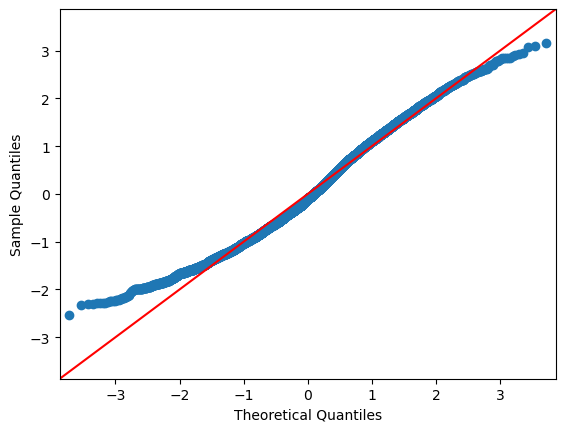

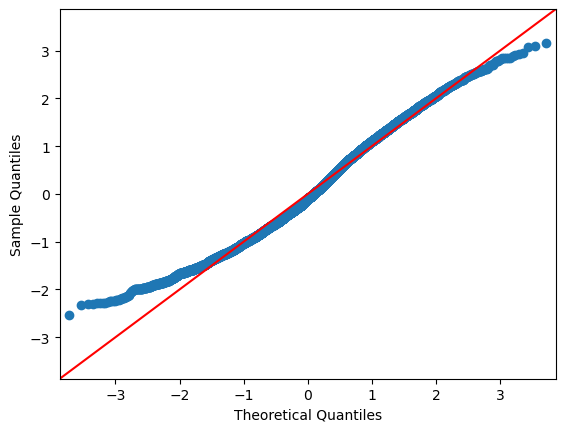

In [175]:
qqplot(data=model.resid, fit=True, line="45")

The residual standard error is simply the standard deviation of residuals from my model. A lower RSE indicates a more accurate model. As we can see below, the RSE of 245 indicates that my model is not a perfect fit of the data, but it is not a terrible fit either. 

In [177]:
print(f"The residual standard error is {model.resid.std(ddof=X.shape[1])}.")

The residual standard error is 245.91819247649136.


The mean squared error may be helpful in understanding how severe the difference between predicted and actual values are. This is a method very sensitive to outliers, which I know I retained in my data analysis section. Regardless, I have a large MSE of 60,481 and an extremely large RSE (below). This supports the visualizations in the QQ plot showing tails at either end of the data where the model is much less accurate.

In [179]:
print(f"The mean squared error is {model.mse_resid} and the residual standard error is {model.mse_resid **2}.")

The mean squared error is 60481.80920291232 and the residual standard error is 3658049244.4574895.


The following plots are visualizations of each feature's residuals. Notice that almost all plots (top-left) visualizes residuals at near equal lengths on average -- this means that there is little variance in the models errors in predictions compared to the actual data (Understanding QQ plots). This holds true except for Tenure, which is shown in the middle of the data to have less variance in residuals compared to the rest of the feature.

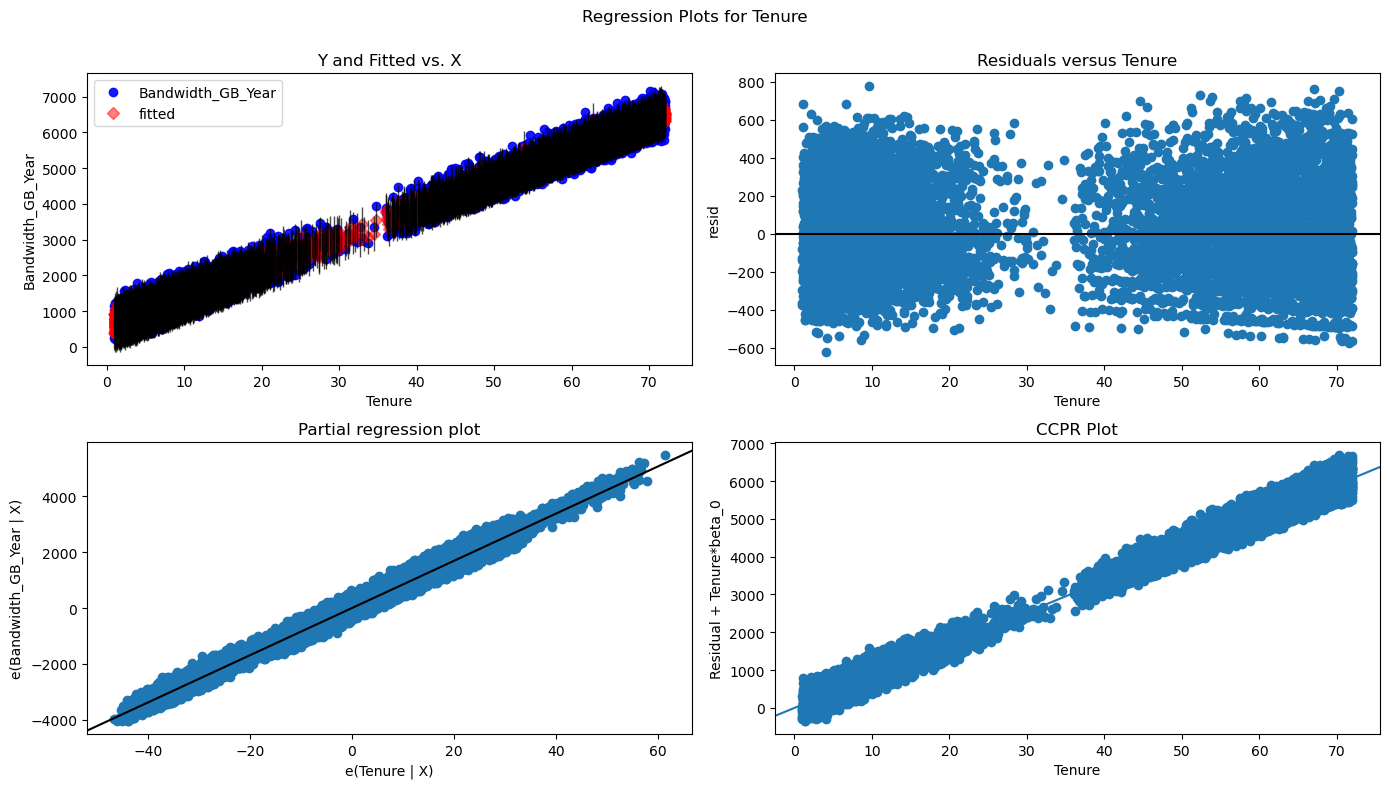

In [181]:
#(Geeksforgeeks)
# modify figure size 
fig = plt.figure(figsize=(14, 8)) 
  
# creating regression plots 
fig = sm.graphics.plot_regress_exog(model, 'Tenure', fig=fig) 

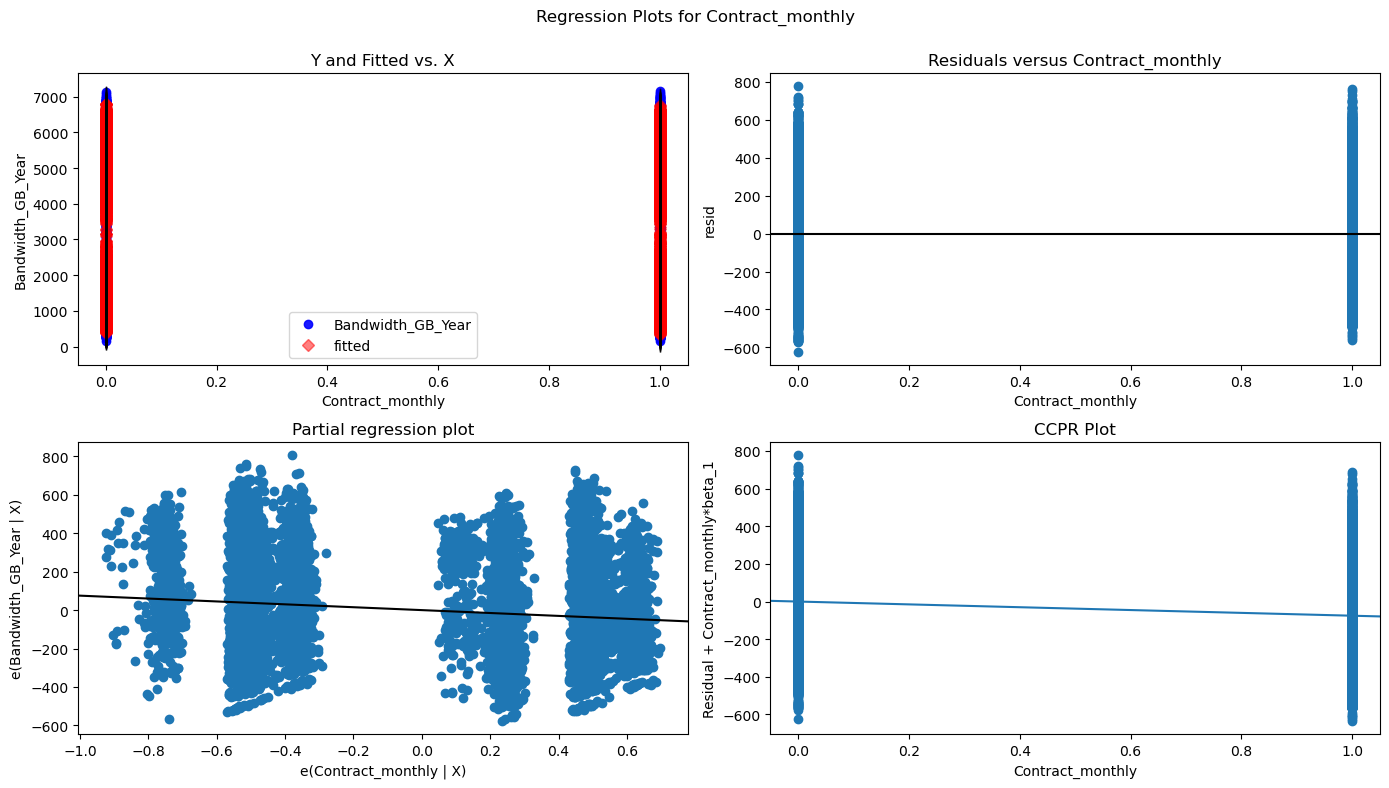

In [182]:
 # modify figure size 
fig = plt.figure(figsize=(14, 8)) 
  
# creating regression plots 
fig = sm.graphics.plot_regress_exog(model, 'Contract_monthly', fig=fig) 

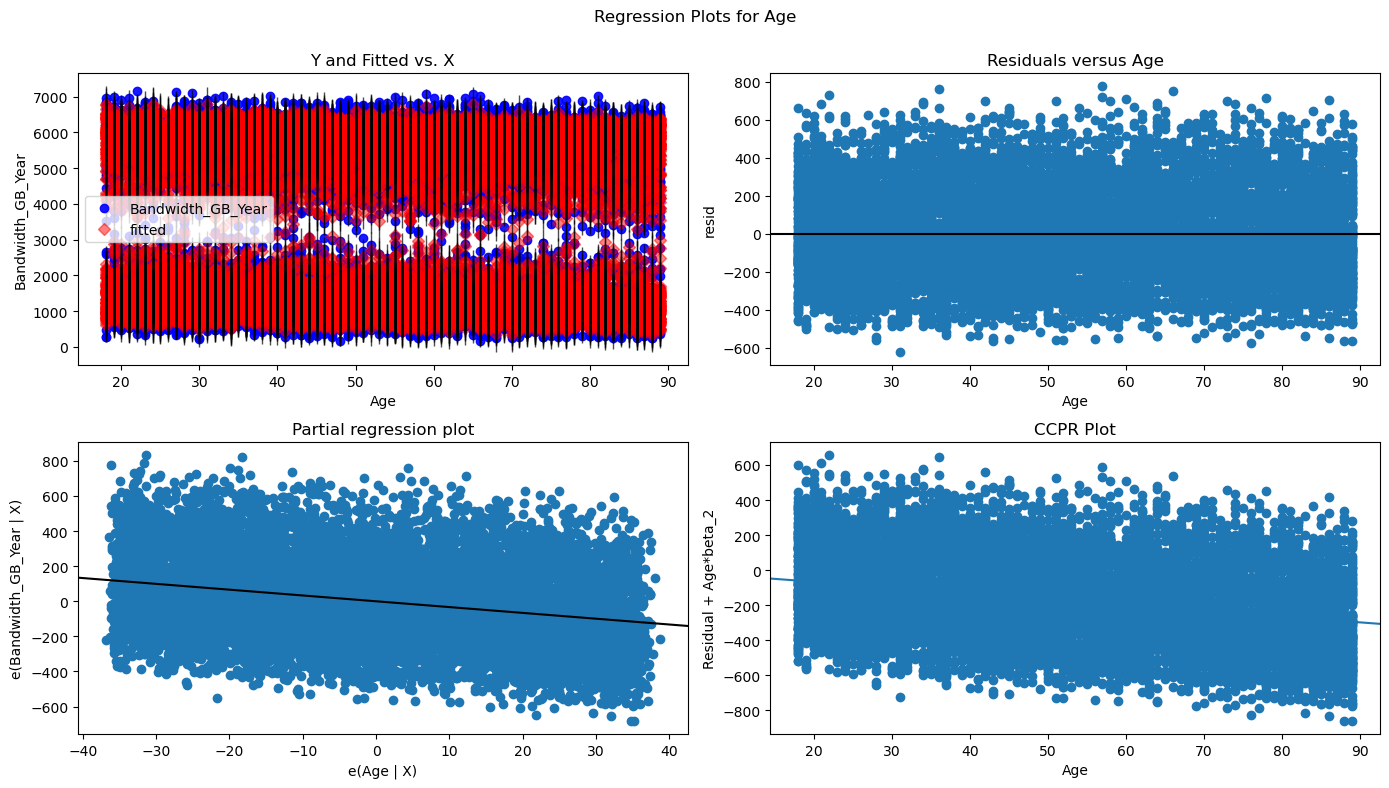

In [183]:
 # modify figure size 
fig = plt.figure(figsize=(14, 8)) 
  
# creating regression plots 
fig = sm.graphics.plot_regress_exog(model, 'Age', fig=fig) 

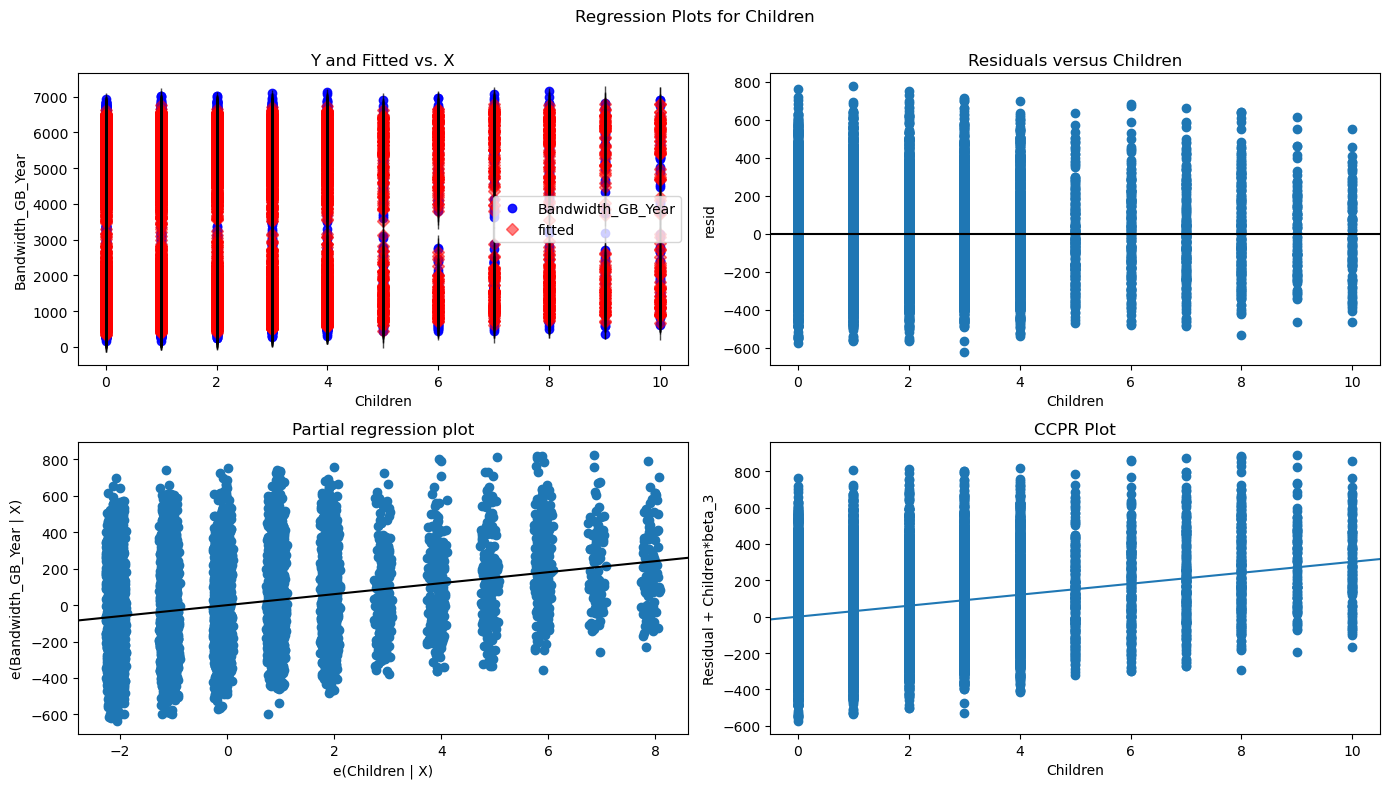

In [184]:
 # modify figure size 
fig = plt.figure(figsize=(14, 8)) 
  
# creating regression plots 
fig = sm.graphics.plot_regress_exog(model, 'Children', fig=fig) 

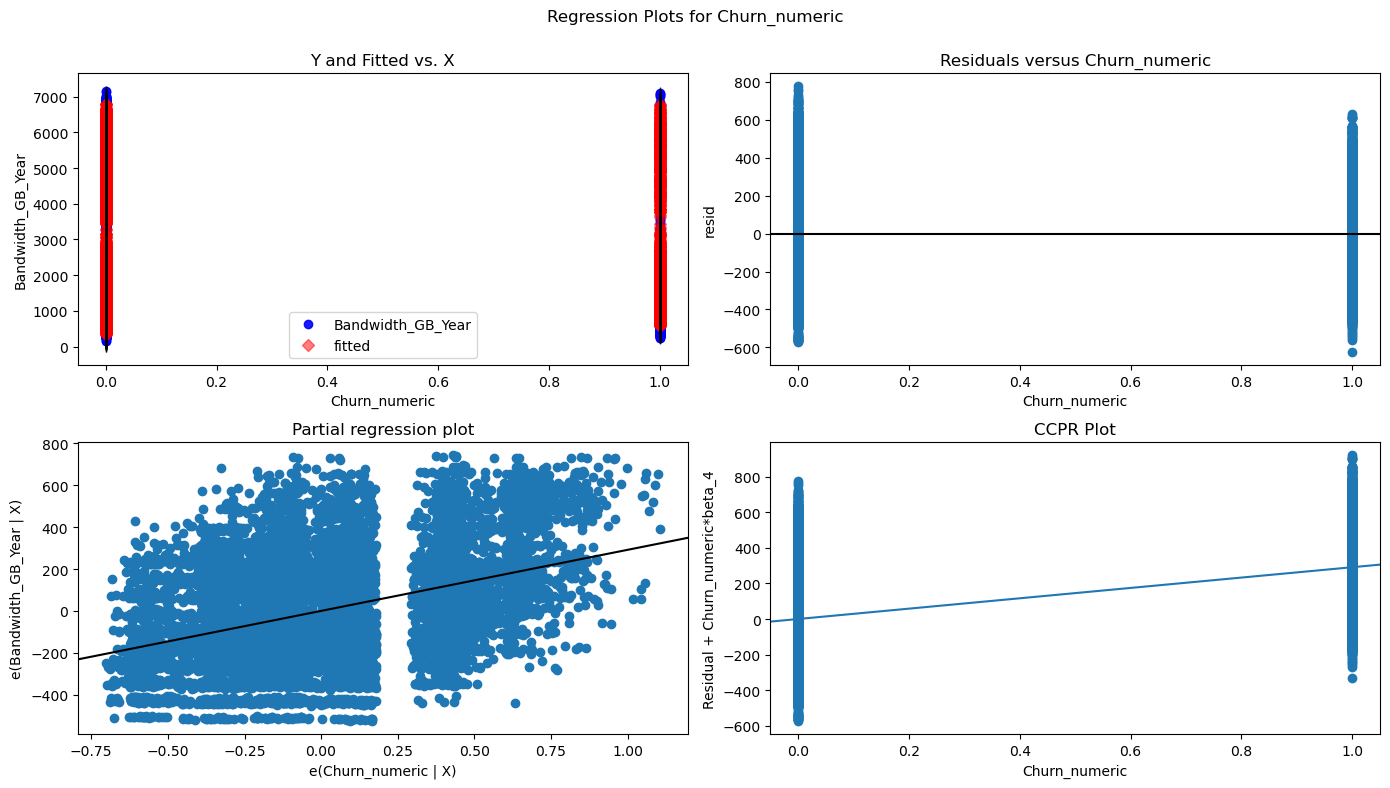

In [185]:
 # modify figure size 
fig = plt.figure(figsize=(14, 8)) 
  
# creating regression plots 
fig = sm.graphics.plot_regress_exog(model, 'Churn_numeric', fig=fig) 

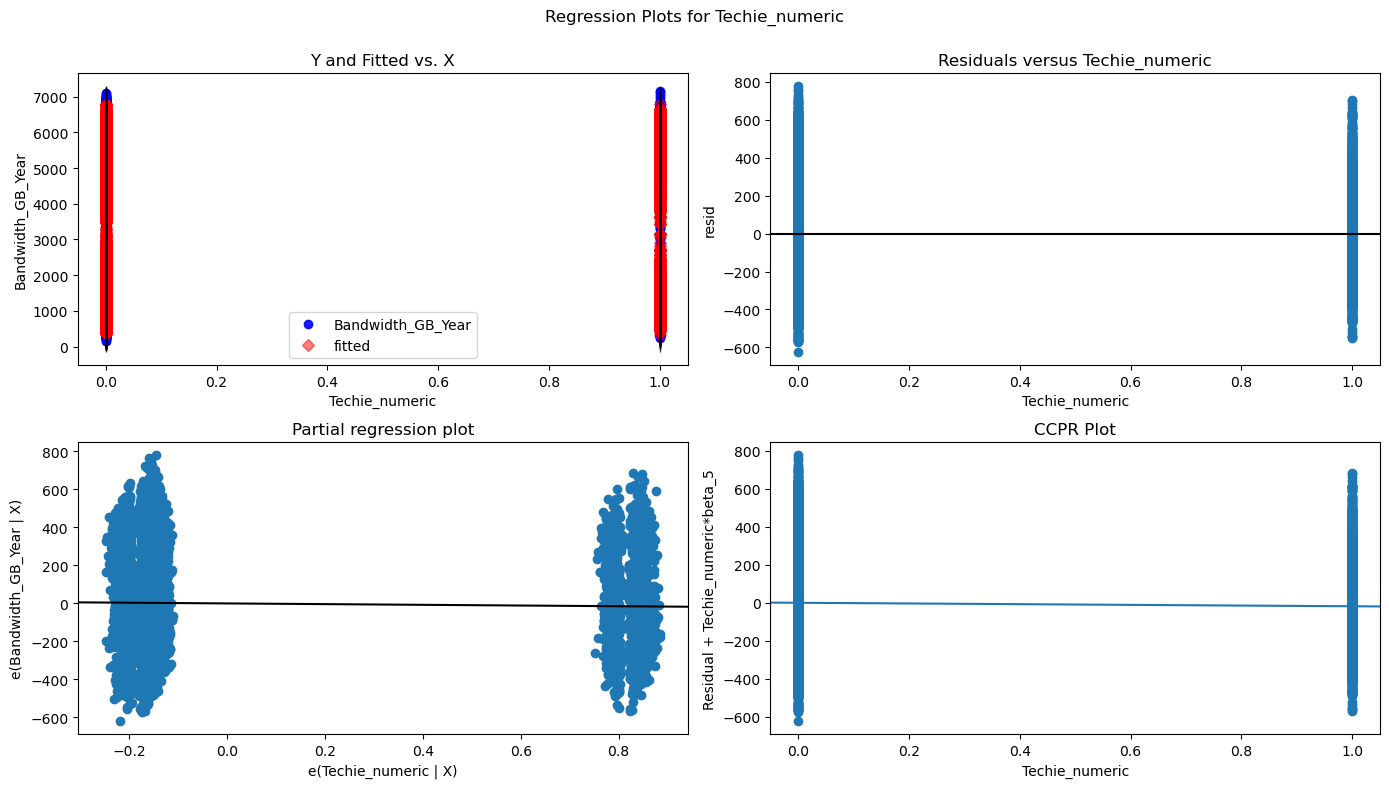

In [186]:
 # modify figure size 
fig = plt.figure(figsize=(14, 8)) 
  
# creating regression plots 
fig = sm.graphics.plot_regress_exog(model, 'Techie_numeric', fig=fig) 

#### __E3. Code__ <a name="endcode"></a>
Code and documentation provided within 'D208 PA pt1 Aaminah Halipoto.ipynb'

#### __F1. Results__ <a name="results"></a>
__A. Regression equation__ </br>
The regression equation gleaned from the reduced model is as follows: 
>y-hat (change in average yearly bandwidth consumption) = 560.0007 (y-intercept) +84.3378 (Tenure) -75.2456 (Monthly contract) -3.3091(Age) +30.1849 (Children) +291.5008 (Churn) -18.4170 (Techie)

__B. Coefficients in the regression equation__ </br>
This equation is useful for a rough understanding of the relationships between explanatory variables and the response variable, a customer's yearly consumed bandwidth. _The below interpretations are assuming that all other variables are held constant._ </br>
At a glance, I understand that the consumed bandwidth (Y) increases by 560.0007 units when all explanatory variables are at zero; this is the practical understanding of the y-intercept. </br>
From there, customer tenure increases 1 unit for every 84.3378 unit increase in Y, as Tenure is a numerical variable. Number of children in the household similarly increases by 1 unit as Y increases by 30.1849 units. Age increases by 1 unit as Y decreases by 3.3091 units.

For categorical variables, interpretation is slightly different (Grace-Martin, 2023). We can understand the consumed bandwidth as:
* _decreasing_ 75.2456 units if the customer has a monthly contract ('Contract_monthly' = 1) as opposed to a different contract ('Contract_monthly' = 0),
* _increasing_ 291.5008 units if there is churn ('Churn_numeric' = 1) as opposed to no churn ('Churn_numeric' = 0), and
* _decreasing_  18.4170 units if the customer considers themself a techie ('Techie_numeric' = 1) as opposed to not ('Techie_numeric' = 0) .

__C. Statistical significance__ </br>
The prob(f-statistic) is a measure of the overall significance of the regression; my reduced model has a prob(f-statistic) of 0.000, indicating that the regression does accurately describe the dataset. The adjusted R-squared is very high at .987. This remained the same as all previous iterations of the model. In general, the Akaike's Information Criteria value and Bayesian information criteria values of 1.385e+05 indicate that the model is a good fit. 
Additionally, the 0.000 measure of Prob(Omnibus) Test (of skew and kurtosis) indicates to me that the residuals are normally distributed.

This model conveys great practical significance as well. Despite limitations and possible errors in creating the model, I have isolated 6 features that strongly correlate to the response variable. As Tenure is a measure of months spent as a customer, it is unlikely to equal 0 for most customers, and the value of Tenure increases constantly through time. Children is also a discrete measurement that takes time to change, as the number of children in a household is not likely to fluctuate drastically. The least affective feature Age is constantly changing, making it the variable that may skew interpretations of the model (as it cannot remain constant for very long). Along with three of five explanatory variables describing binary states -- whether a customer has a monthly plan, and so forth -- it is actually possible that most variables could stay constant as one changes: meaning the coefficient interpretations in the regression equation above could be relied on in a practical scenario.

__D. Limitations of Analysis__ </br>
My model is shown to correlate with the dataset involved, but there are still limits on how deeply to rely on the results. For one, I retained outliers that could definitely skew the data, as regression models are not resistant to outliers in general (Middleton, 2024). This could artificially inflate the measure of accuracy in this model. 
Of the wrapper feature selection methods, I chose the general backwards stepwise elimination approach: while my results are still valid, perhaps I would have different insights by focusing instead on maximizing metrics such as BIC. This is not the most pressing limitation, seeing as the model has returned consistently high R-squared values and minimal changes in accuracy between iterations. 

#### __F2. Recommendations__ <a name="recommendations"></a>
The final regression model proffers six explanatory variables as explanation for 98.7% of the response variable, Bandwidth_GB_Year. Given our known errors and limitations within the dataset, it is safe to say that we can still glean insights from this model. </br>

From a business perspective, we would like to prioritize customers as they increase profits, consume services, and remain within the company. It is a significant business finding to know that should all variables be at 0, the yearly bandwidth consumed per customer, on average, is high. It is mostly obvious that the yearly consumption of data is correlated to the amount in months that the customer has spent with the company ('Tenure') -- which is a large takeaway from the model. Additionally, having more children ('Children'), having contracts other than the monthly type ('Contract_monthly'), ending service with the company ('Churn'), being younger in age ('Age'), and being <i>less</i> technologically advanced ('Techie') are all correlated with increases in a customer's yearly average data consumption. </br>

Seeing that consumption of services produces profit, we could look to prioritize customers with the above attributes in hopes of increasing gains to the company. Contract permutations could be re-examined to understand why customers tend to use less broadband when under monthly contracts as opposed to others; we cannot glean the reason why in this study, but it is certainly a point of interest for future studies. Younger customers who do not consider themselves 'techies' may also be a good niche to focus on, as well as households with many children: this opens up new niches of customer concentration that are important in a marketing perspective.

#### __G. Panopto Demonstration__ <a name="panoptolink"></a>
https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=69e41b1a-0467-4bec-ae0e-b1f00125ea58

#### __H. Sources of Third-Party Code__ <a name="codesources"></a>
Bobbitt, Zack. (2022, October 12). How to test for multicollinearity in python. Statology. https://www.statology.org/multicollinearity-in-python/ https://www.statology.org/multicollinearity-in-python/

GeeksforGeeks. (2022, February 21). How to create a residual plot in Python. https://www.geeksforgeeks.org/how-to-create-a-residual-plot-in-python/ 

Keith, M. (n.d.). Python: MLR, OLS, standardization, normalization. YouTube. https://youtu.be/QH_elD_JKuc?si=pLDfsXqs1c2FtEai 

Middleton, Keiona. (n.d.) D208 - Webinar: Getting Started with D208 Part II (November). Panopto. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=39bbe2db-de7d-4bf5-913b-af5c0003da9d

Sewell, W. (n.d.). D207 Exploratory data analysis webinar: episode 3. Panopto. 
	https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=58f509ac-47df-4544-9f0a-	
	aeb5016ab8f7

#### __I. Web Sources__ <a name="sources"></a> </br>
##### __References__ </br> 
Assumptions of multiple linear regression. Statistics Solutions. (n.d.). 
>https://www.khoury.northeastern.edu/home/vip/teach/MLcourse/1.1_LinearRegression/LectureNotes/Assumptions of Multiple Linear Regression - Statistics Solutions.pdf </br>

Grace-Martin, K. (2023, June 19). Interpreting regression coefficients. The Analysis Factor.
>https://www.theanalysisfactor.com/interpreting-regression-coefficients/</br>

R or python. Western Governors University. (2023, July 7). 
>https://www.wgu.edu/online-it-degrees/programming-languages/r-or-python.html

Understanding QQ plots. Understanding QQ Plots | UVA Library. (n.d.). 
>https://library.virginia.edu/data/articles/understanding-q-q-plots 
